In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

In [11]:
df=pd.read_csv('Indian automoble buying behavour study 1.0.csv')

In [12]:
print(df.head())

   Age Profession Marrital Status      Education  No of Dependents  \
0   27   Salaried          Single  Post Graduate                 0   
1   35   Salaried         Married  Post Graduate                 2   
2   45   Business         Married       Graduate                 4   
3   41   Business         Married  Post Graduate                 3   
4   31   Salaried         Married  Post Graduate                 2   

  Personal loan House Loan Wife Working   Salary  Wife Salary  Total Salary  \
0           Yes         No           No   800000            0        800000   
1           Yes        Yes          Yes  1400000       600000       2000000   
2           Yes        Yes           No  1800000            0       1800000   
3            No         No          Yes  1600000       600000       2200000   
4           Yes         No          Yes  1800000       800000       2600000   

     Make    Price  
0     i20   800000  
1    Ciaz  1000000  
2  Duster  1200000  
3    City  1200000  

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [14]:
df.describe().round(2)

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.00,99.00,99.00,99.00,99.00,99.00
mean,36.31,2.18,1736363.64,534343.43,2270707.07,1194040.40
std,6.25,1.34,673621.73,605444.96,1050777.41,437695.54
min,26.00,0.00,200000.00,0.00,200000.00,110000.00
25%,31.00,2.00,1300000.00,0.00,1550000.00,800000.00
50%,36.00,2.00,1600000.00,500000.00,2100000.00,1200000.00
75%,41.00,3.00,2200000.00,900000.00,2700000.00,1500000.00
max,51.00,4.00,3800000.00,2100000.00,5200000.00,3000000.00


In [19]:
null_values=pd.concat([df.isnull().sum().sort_values(ascending=False),((df.isnull().sum()*100)/len(df)).sort_values(ascending=False)],axis=1)
null_values.columns=['Null_values','Null_values%']
null_values

,Null_values,Null_values%
Age,0,0.0
Profession,0,0.0
Marrital Status,0,0.0
Education,0,0.0
No of Dependents,0,0.0
Personal loan,0,0.0
House Loan,0,0.0
Wife Working,0,0.0
Salary,0,0.0
Wife Salary,0,0.0


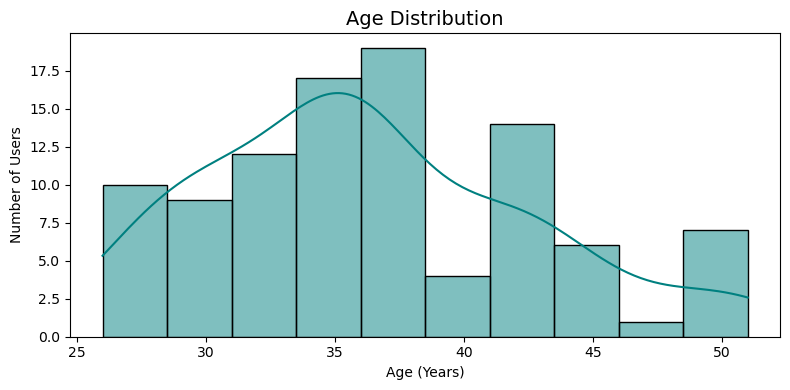

In [23]:
# Distribution of Age
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], bins=10, kde=True, color='teal')
plt.title('Age Distribution', fontsize=14)
plt.xlabel('Age (Years)', fontsize=10)
plt.ylabel('Number of Users', fontsize=10)
plt.tight_layout()
plt.show()

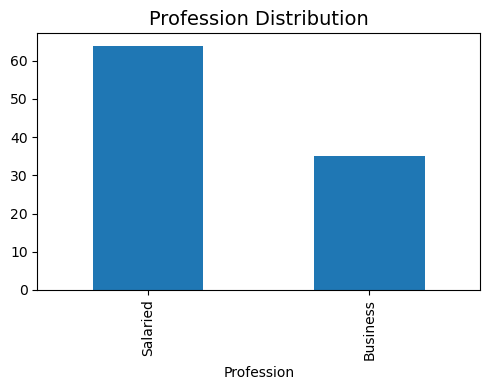

In [24]:
# Distribution of Profession
plt.figure(figsize=(5, 4))
df['Profession'].value_counts().plot.bar()
plt.title('Profession Distribution', fontsize=14)
#plt.xlabel('Profession', fontsize=10)
#plt.ylabel('Number of Users', fontsize=10)
plt.tight_layout()
plt.show()

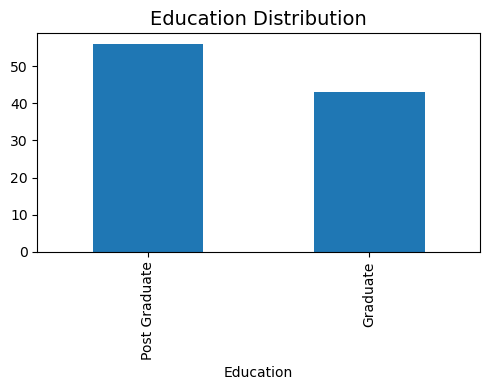

In [25]:
# Distribution of Education
plt.figure(figsize=(5, 4))
df['Education'].value_counts().plot.bar()
plt.title('Education Distribution', fontsize=14)
#plt.xlabel('Education', fontsize=10)
#plt.ylabel('Number of Users', fontsize=10)
plt.tight_layout()
plt.show()

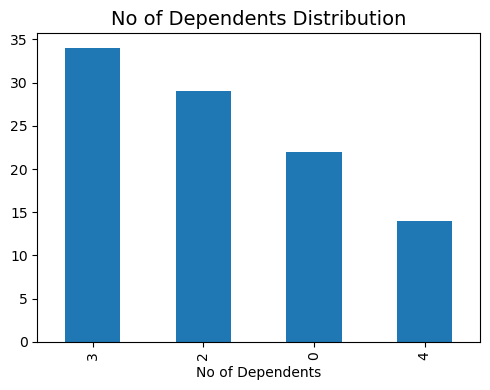

In [26]:
# Distribution of No. of dependents
plt.figure(figsize=(5, 4))
df['No of Dependents'].value_counts().plot.bar()
plt.title('No of Dependents Distribution', fontsize=14)
#plt.xlabel('No of Dependents', fontsize=10)
#plt.ylabel('Number of Users', fontsize=10)
plt.tight_layout()
plt.show()


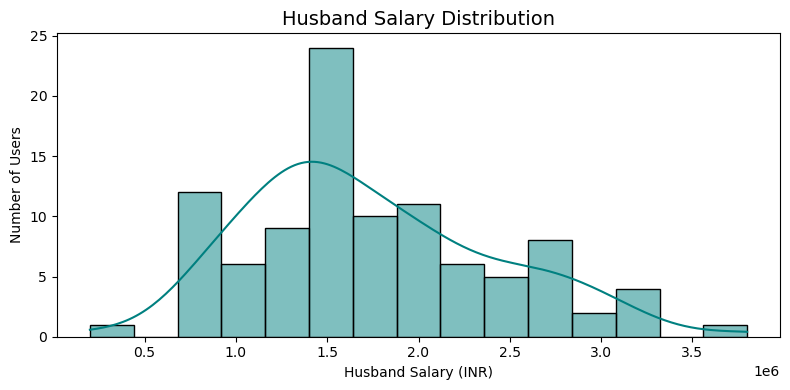

In [27]:
# Distribution of Husband Salary
plt.figure(figsize=(8, 4))
sns.histplot(df['Salary'], bins=15, kde=True, color='teal')
plt.title('Husband Salary Distribution', fontsize=14)
plt.xlabel('Husband Salary (INR)', fontsize=10)
plt.ylabel('Number of Users', fontsize=10)
plt.tight_layout()
plt.show()

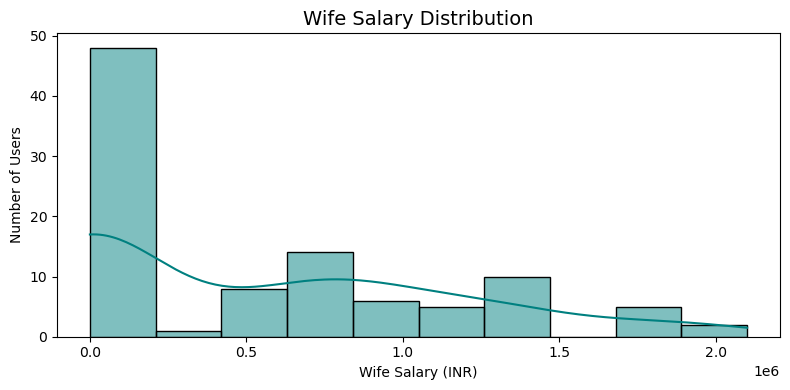

In [28]:
# # Distribution of Wife Salary
plt.figure(figsize=(8, 4))
sns.histplot(df['Wife Salary'], bins=10, kde=True, color='teal')
plt.title('Wife Salary Distribution', fontsize=14)
plt.xlabel('Wife Salary (INR)', fontsize=10)
plt.ylabel('Number of Users', fontsize=10)
plt.tight_layout()
plt.show()

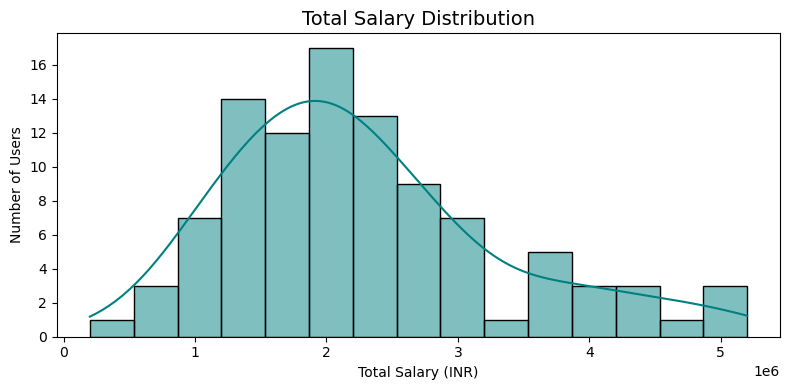

In [29]:
# Distribution of Total Salary
plt.figure(figsize=(8, 4))
sns.histplot(df['Total Salary'], bins=15, kde=True, color='teal')
plt.title('Total Salary Distribution', fontsize=14)
plt.xlabel('Total Salary (INR)', fontsize=10)
plt.ylabel('Number of Users', fontsize=10)
plt.tight_layout()
plt.show()

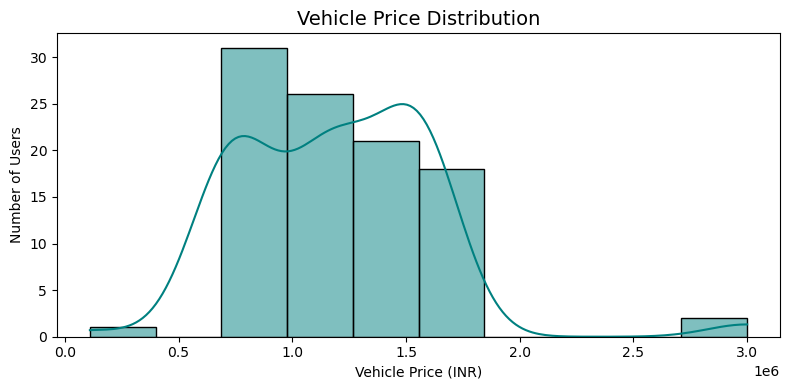

In [30]:
# Distribution of Vehicle price
plt.figure(figsize=(8, 4))
sns.histplot(df['Price'], bins=10, kde=True, color='teal')
plt.title('Vehicle Price Distribution', fontsize=14)
plt.xlabel('Vehicle Price (INR)', fontsize=10)
plt.ylabel('Number of Users', fontsize=10)
plt.tight_layout()
plt.show()

In [31]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical and numerical columns for clustering
demographic_cols = ['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
                    'Personal loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary', 'Total Salary', 'Price']

# Separate features into categorical and numerical
categorical_features = [col for col in demographic_cols if df[col].dtype == 'object']
numerical_features = [col for col in demographic_cols if df[col].dtype in ['int64', 'float64']]

# Create a preprocessor using ColumnTransformer
# It will apply OneHotEncoder to categorical features and StandardScaler to numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Apply preprocessing
df_processed = preprocessor.fit_transform(df[demographic_cols])

# Convert the processed data back to a DataFrame for easier handling
# Get feature names after one-hot encoding
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(ohe_feature_names)

df_processed = pd.DataFrame(df_processed, columns=all_feature_names)

print(df_processed.head())

        Age  No of Dependents    Salary  Wife Salary  Total Salary     Price  \
0 -1.498630         -1.642313 -1.397118    -0.887055     -1.406760 -0.904843   
1 -0.211304         -0.136859 -0.501877     0.108995     -0.258937 -0.445579   
2  1.397855          1.368594  0.094950    -0.887055     -0.450240  0.013685   
3  0.754191          0.615867 -0.203464     0.108995     -0.067633  0.013685   
4 -0.854967         -0.136859  0.094950     0.441012      0.314975  0.932213   

   Profession_Business  Profession_Salaried  Marrital Status_Married  \
0                  0.0                  1.0                      0.0   
1                  0.0                  1.0                      1.0   
2                  1.0                  0.0                      1.0   
3                  1.0                  0.0                      1.0   
4                  0.0                  1.0                      1.0   

   Marrital Status_Single  Education_Graduate  Education_Post Graduate  \
0           

In [32]:
print(df_processed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      99 non-null     float64
 1   No of Dependents         99 non-null     float64
 2   Salary                   99 non-null     float64
 3   Wife Salary              99 non-null     float64
 4   Total Salary             99 non-null     float64
 5   Price                    99 non-null     float64
 6   Profession_Business      99 non-null     float64
 7   Profession_Salaried      99 non-null     float64
 8   Marrital Status_Married  99 non-null     float64
 9   Marrital Status_Single   99 non-null     float64
 10  Education_Graduate       99 non-null     float64
 11  Education_Post Graduate  99 non-null     float64
 12  Personal loan_No         99 non-null     float64
 13  Personal loan_Yes        99 non-null     float64
 14  House Loan_No            99 

In [33]:
# Correlation analysis
corr_matrix = df_processed[['Age', 'Salary','Wife Salary','Total Salary','Price']].corr()
print(corr_matrix)

                   Age    Salary  Wife Salary  Total Salary     Price
Age           1.000000  0.656442     0.288546      0.587082  0.376661
Salary        0.656442  1.000000     0.347934      0.841545  0.547630
Wife Salary   0.288546  0.347934     1.000000      0.799238  0.635858
Total Salary  0.587082  0.841545     0.799238      1.000000  0.717442
Price         0.376661  0.547630     0.635858      0.717442  1.000000


<Axes: >

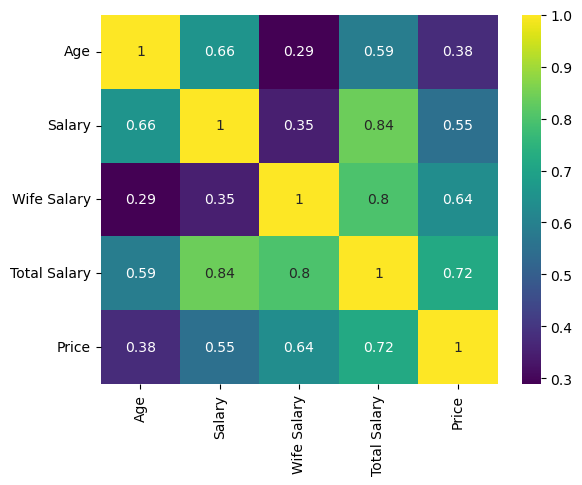

In [34]:
# Heatmap
sns.heatmap(corr_matrix, cmap='viridis', annot=True) 

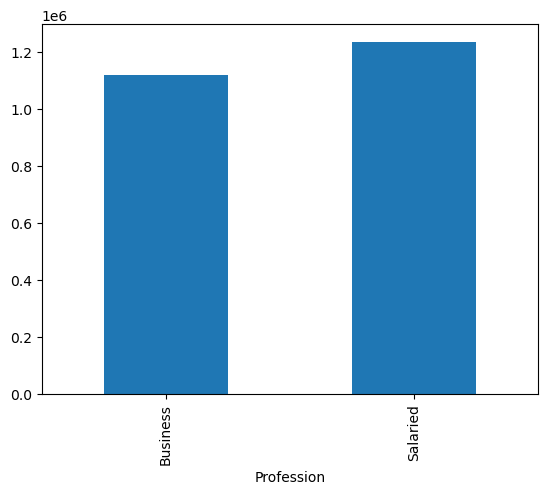

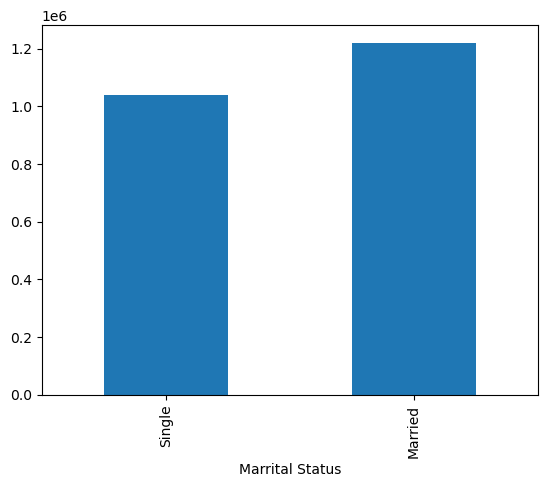

In [35]:
# Group by analysis of categorical variables
df.groupby(['Profession'])['Price'].mean().sort_values().plot.bar()
plt.show()

df.groupby(['Marrital Status'])['Price'].mean().sort_values().plot.bar()
plt.show()

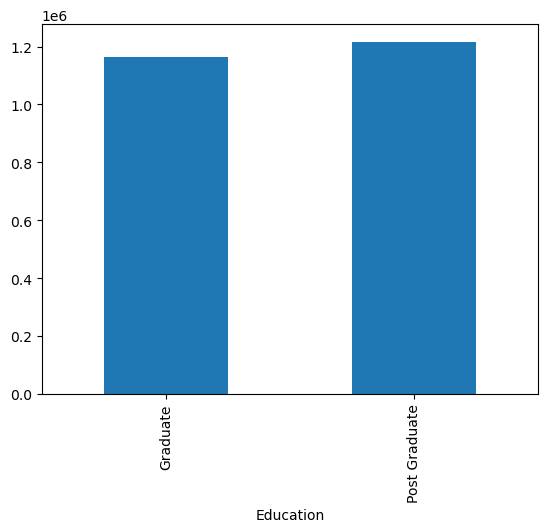

In [36]:
df.groupby(['Education'])['Price'].mean().sort_values().plot.bar()
plt.show()

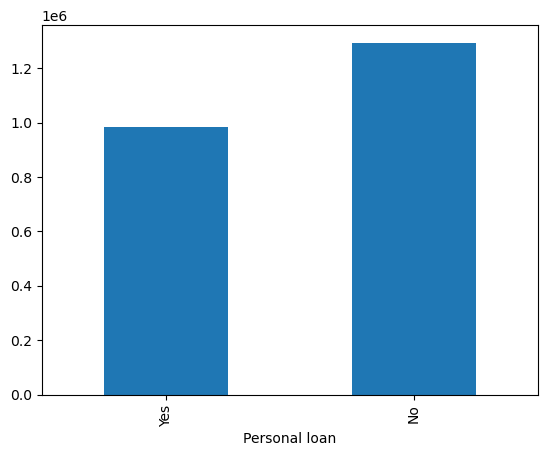

In [37]:
df.groupby(['Personal loan'])['Price'].mean().sort_values().plot.bar()
plt.show()

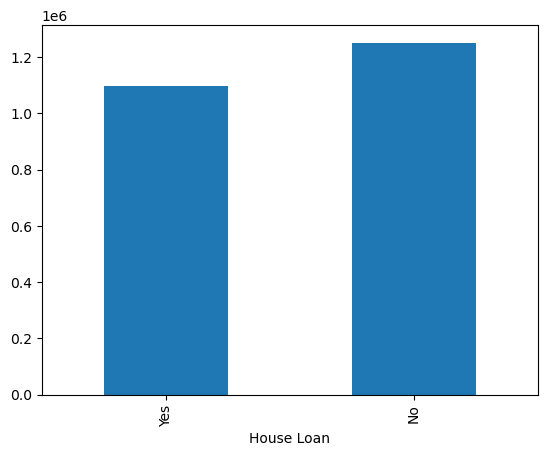

In [38]:
df.groupby(['House Loan'])['Price'].mean().sort_values().plot.bar()
plt.show()

C:\Users\Hp\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Hp\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Hp\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Hp\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Hp\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable

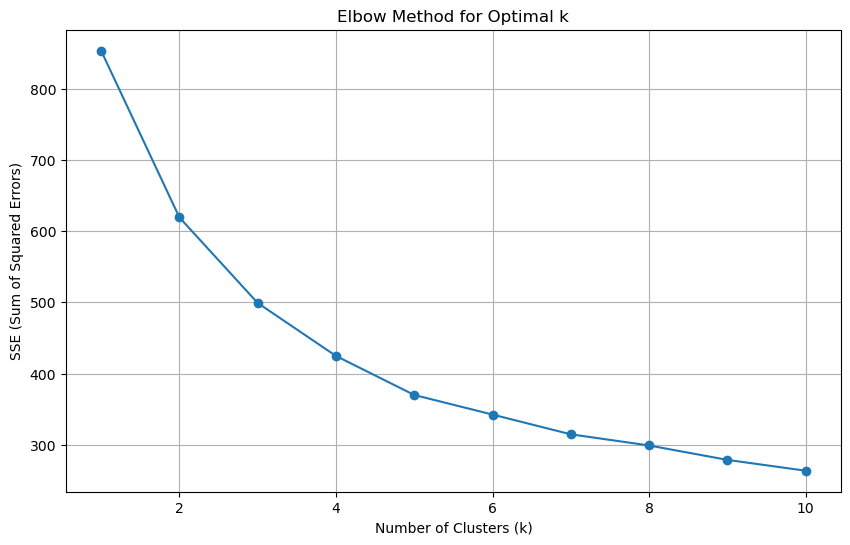

In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine optimal number of clusters using the Elbow Method
sse = [] # Sum of squared distances of samples to their closest cluster center.
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_processed)
    sse.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.savefig('elbow_method.png')

In [40]:
from sklearn.decomposition import PCA
import seaborn as sns

# Apply K-Means clustering with the chosen number of clusters (e.g., 4)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_processed)

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [41]:
# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_processed)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster']

In [42]:
df_pca

,PC1,PC2,Cluster
0,-3.251470,-0.975925,2
1,-0.389534,0.156933,0
2,0.070229,2.520093,1
3,0.459334,0.207556,0
4,0.525671,-0.964987,0
...,...,...,...
94,-0.804006,-1.463153,2
95,4.696901,0.366940,3
96,0.465174,2.206793,1
97,3.289491,-0.139091,3


In [43]:
# Add the PCA components to the DataFrame for plotting
df['pca1'] = df_pca['PC1']
df['pca2'] = df_pca['PC2']
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,Cluster,pca1,pca2
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000,2,-3.251470,-0.975925
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000,0,-0.389534,0.156933
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000,1,0.070229,2.520093
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000,0,0.459334,0.207556
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000,0,0.525671,-0.964987


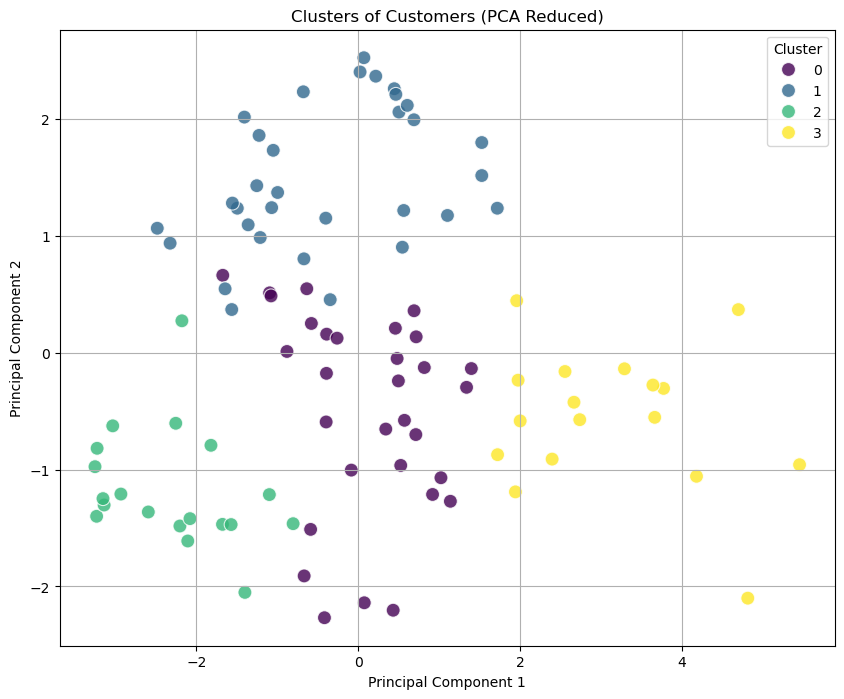

In [44]:
# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis', s=100, alpha=0.8)
plt.title('Clusters of Customers (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.savefig('customer_clusters_pca.png')

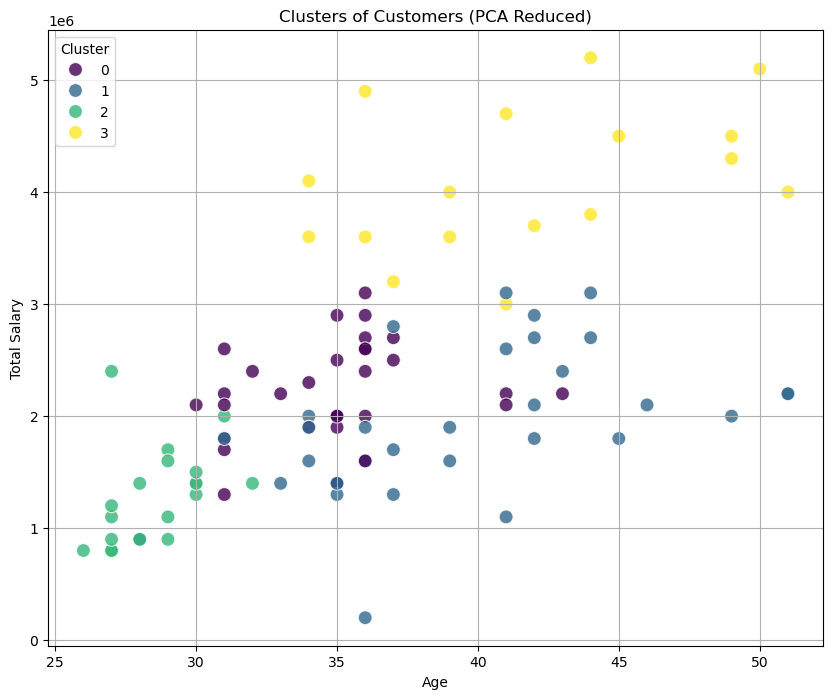

In [45]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age', y='Total Salary', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.8)
plt.title('Clusters of Customers (PCA Reduced)')
plt.xlabel('Age')
plt.ylabel('Total Salary')
plt.legend(title='Cluster')
plt.grid(True)
plt.savefig('customer_clusters_pca.png')

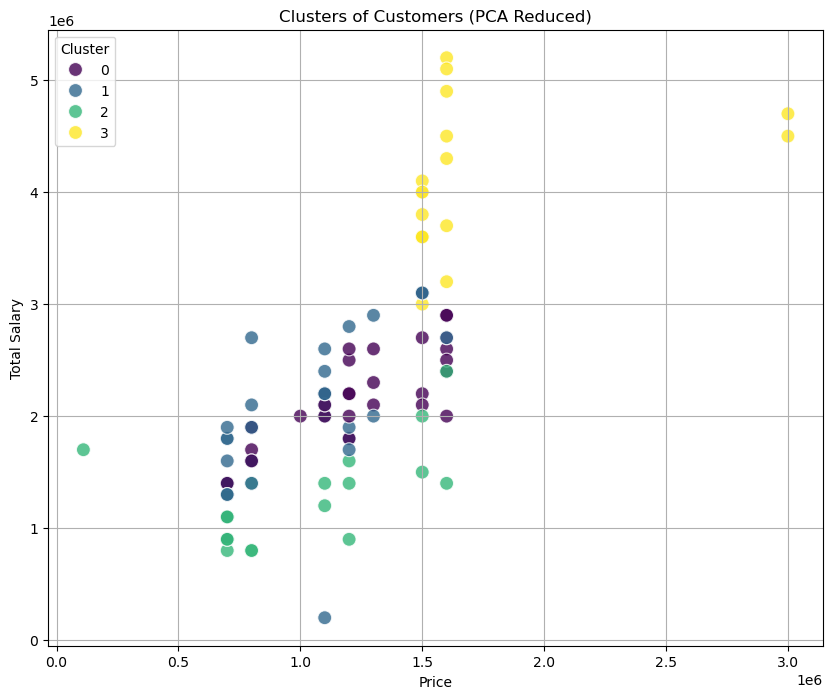

In [46]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Price', y='Total Salary', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.8)
plt.title('Clusters of Customers (PCA Reduced)')
plt.xlabel('Price')
plt.ylabel('Total Salary')
plt.legend(title='Cluster')
plt.grid(True)
plt.savefig('customer_clusters_pca.png')

In [47]:
# Analyze the characteristics of each cluster
cluster_means = df.groupby('Cluster')[numerical_features].mean().round(2)
print("\nCluster Means (Original Scale):")
cluster_means


Cluster Means (Original Scale):


,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
Cluster,,,,,,
0,34.87,2.32,1425806.45,796774.19,2222580.65,1251612.90
1,39.38,3.00,1921875.00,0.00,1921875.00,984375.00
2,28.58,0.21,1189473.68,105263.16,1294736.84,984736.84
3,41.82,2.59,2564705.88,1541176.47,4105882.35,1717647.06


In [48]:
# Get the salary and total salary ranges for each of the 4 clusters
cluster_salary_ranges = {}
cluster_total_salary_ranges = {}

for cluster_id in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster_id]

    # Salary range
    min_salary = cluster_data['Salary'].min()
    max_salary = cluster_data['Salary'].max()
    cluster_salary_ranges[cluster_id] = (min_salary, max_salary)

    # Total Salary range
    min_total_salary = cluster_data['Total Salary'].min()
    max_total_salary = cluster_data['Total Salary'].max()
    cluster_total_salary_ranges[cluster_id] = (min_total_salary, max_total_salary)

print("Salary Ranges for Each Cluster (4 Clusters):")
for cluster_id, (min_s, max_s) in cluster_salary_ranges.items():
    print(f"Cluster {cluster_id}: Salary from INR {min_s:,} to INR {max_s:,}")

print("\nTotal Salary Ranges for Each Cluster (4 Clusters):")
for cluster_id, (min_ts, max_ts) in cluster_total_salary_ranges.items():
    print(f"Cluster {cluster_id}: Total Salary from INR {min_ts:,} to INR {max_ts:,}")

Salary Ranges for Each Cluster (4 Clusters):
Cluster 0: Salary from INR 900,000 to INR 2,200,000
Cluster 1: Salary from INR 200,000 to INR 3,100,000
Cluster 2: Salary from INR 800,000 to INR 2,400,000
Cluster 3: Salary from INR 1,900,000 to INR 3,800,000

Total Salary Ranges for Each Cluster (4 Clusters):
Cluster 0: Total Salary from INR 1,300,000 to INR 3,100,000
Cluster 1: Total Salary from INR 200,000 to INR 3,100,000
Cluster 2: Total Salary from INR 800,000 to INR 2,400,000
Cluster 3: Total Salary from INR 3,000,000 to INR 5,200,000


In [49]:
# For categorical features, we can look at value counts per cluster
print("\nCategorical Feature Distribution per Cluster:")
for col in categorical_features:
    print(f"\n--- {col} ---")
    print(df.groupby('Cluster')[col].value_counts(normalize=True))


Categorical Feature Distribution per Cluster:

--- Profession ---
Cluster  Profession
0        Salaried      0.645161
         Business      0.354839
1        Salaried      0.593750
         Business      0.406250
2        Salaried      0.578947
         Business      0.421053
3        Salaried      0.823529
         Business      0.176471
Name: proportion, dtype: float64

--- Marrital Status ---
Cluster  Marrital Status
0        Married            1.000000
1        Married            1.000000
2        Single             0.789474
         Married            0.210526
3        Married            1.000000
Name: proportion, dtype: float64

--- Education ---
Cluster  Education    
0        Graduate         0.516129
         Post Graduate    0.483871
1        Post Graduate    0.531250
         Graduate         0.468750
2        Post Graduate    0.631579
         Graduate         0.368421
3        Post Graduate    0.705882
         Graduate         0.294118
Name: proportion, dtype: float64



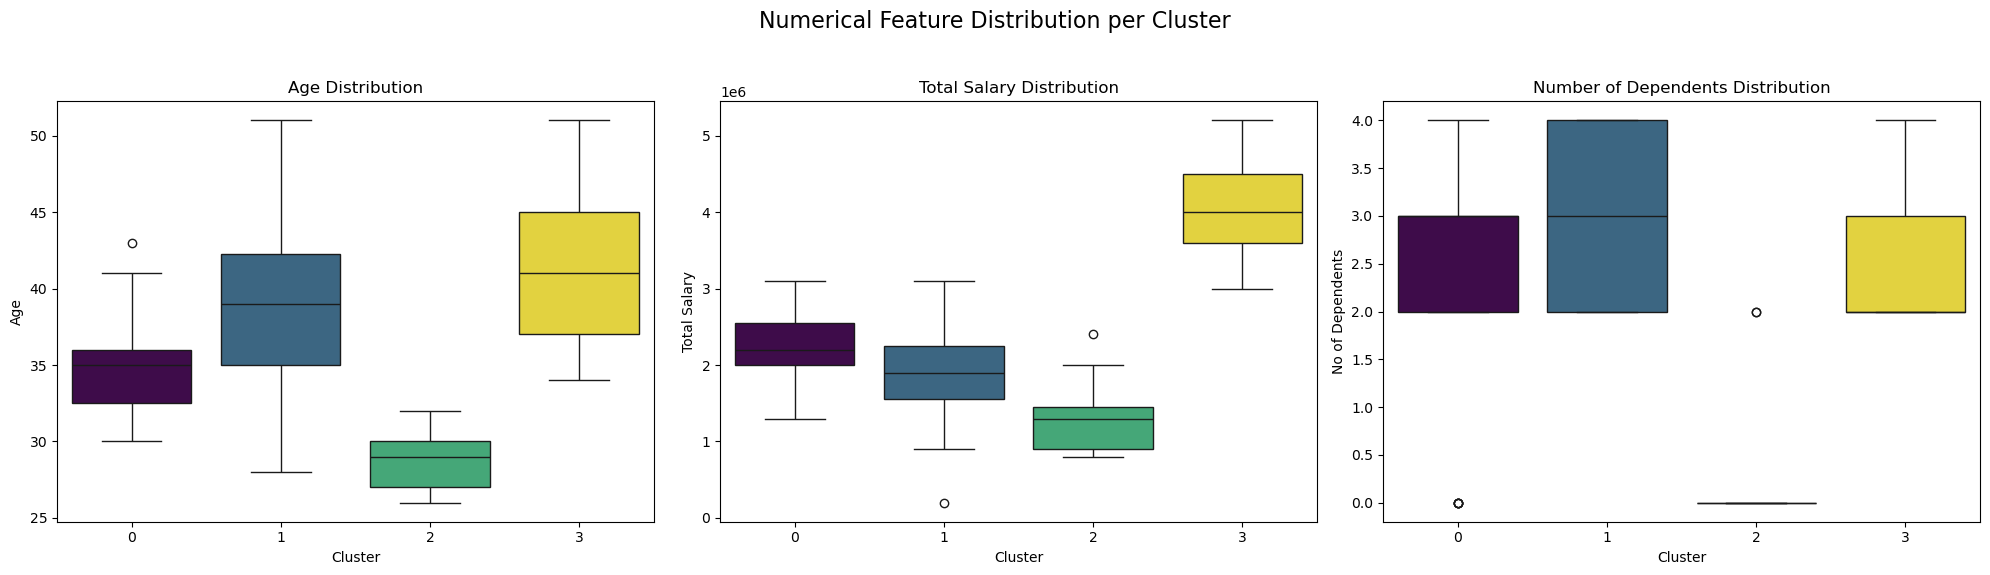

In [50]:
# Create box plots to visualize the distribution of numerical features in each cluster
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Numerical Feature Distribution per Cluster', fontsize=16)
#sns.boxplot(ax=axes[0], x='Cluster', y='Age', data=df, palette='viridis')
#axes[0].set_title('Age Distribution')
sns.boxplot(ax=axes[0],  x='Cluster', y='Age', data=df, palette='viridis', hue='Cluster', legend=False)
axes[0].set_title('Age Distribution')
sns.boxplot(ax=axes[1], x='Cluster', y='Total Salary', data=df, palette='viridis', hue='Cluster', legend=False)
axes[1].set_title('Total Salary Distribution')
sns.boxplot(ax=axes[2], x='Cluster', y='No of Dependents', data=df, palette='viridis', hue='Cluster', legend=False)
axes[2].set_title('Number of Dependents Distribution')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [51]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(df_processed, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(df_processed, df['Cluster'])
print(f"Davies-Bouldin Index: {db_index:.3f}")

# Calculate Calinski-Harabasz Index
ch_index = calinski_harabasz_score(df_processed, df['Cluster'])
print(f"Calinski-Harabasz Index: {ch_index:.3f}")

Silhouette Score: 0.224
Davies-Bouldin Index: 1.479
Calinski-Harabasz Index: 31.950
